In [36]:
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

In [37]:
file_path = "C:\\Users\\DELL\\Desktop\\synthetic data generation\\Amazon Prime video.csv"
df = pd.read_csv(file_path)


In [38]:
# Display the first few rows of the dataset
print(df.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

  date_added  release_year rating duration                listed_in  \
0  30-Mar-21          2014    NaN  113 min            Comedy, Drama   
1  30-Mar-21          2018    13+  110 min     Drama, International   
2  30

In [39]:
review_column = 'description'

In [40]:
# Load pre-trained GPT-2 model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')


In [41]:
# Ensure the model is in evaluation mode
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

GENERRATE SYNTHETIC DATA

In [42]:
def generate_synthetic_reviews(prompt, max_length=100, num_return_sequences=5):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=num_return_sequences, do_sample=True)
    return [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]


In [43]:
 #Example usage
prompt = "This movie was"
synthetic_reviews = generate_synthetic_reviews(prompt)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [44]:
# Print generated synthetic reviews
for review in synthetic_reviews:
    print(review)


This movie was originally filmed in 1991 with the intention of making a comic movie based on the best-selling book series Daredevil, by John Byrne, written by John Kroll and drawn by Kurt Sutter. That book included Daredevil, the most iconic character of all time. In 1997 Spider-Man was released, and we were able to do a spin-off based on Joe Cornish's book.
It was also only a year before Sutter's second solo series would actually kick off a Marvel
This movie was not as important as it has now become. What I want from my children, my grandkids is something that will be seen in the history books, but it would not be something my grandkids would say, 'What was just that movie?' It also makes us care all the more about it. Some people like to say when we did it it was the 'right movies', because they don't have to look very far.

In fact, I believe the people that made
This movie was made for a lot of me and I don't even want to add it here, it's a film that was made about that same topic

In [45]:
# Step 5: Evaluation
import sacrebleu

def evaluate_generated_text(original, generated):
    bleu = sacrebleu.corpus_bleu([generated], [[original]])
    return bleu.score

In [46]:
# Sample evaluation
original_review = "This movie was fantastic with great acting."
generated_review = synthetic_reviews[0]
print("BLEU Score:", evaluate_generated_text(original_review, generated_review))


BLEU Score: 1.7490954988811318


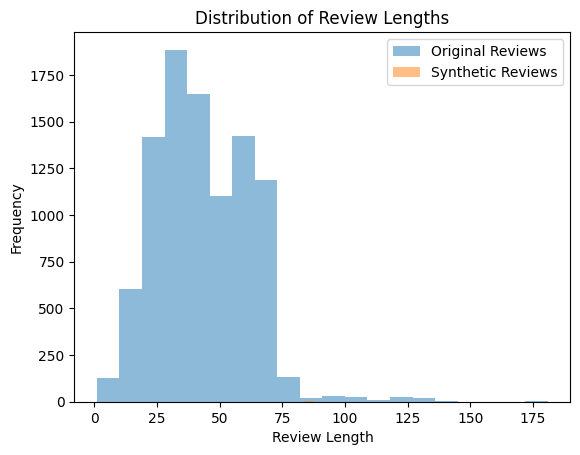

In [47]:
# Step 6: Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plotting the distribution of review lengths
original_lengths = [len(str(review).split()) for review in df[review_column]]
synthetic_lengths = [len(review.split()) for review in synthetic_reviews]

plt.hist(original_lengths, bins=20, alpha=0.5, label='Original Reviews')
plt.hist(synthetic_lengths, bins=20, alpha=0.5, label='Synthetic Reviews')
plt.legend(loc='upper right')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [48]:
# Word cloud visualization
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


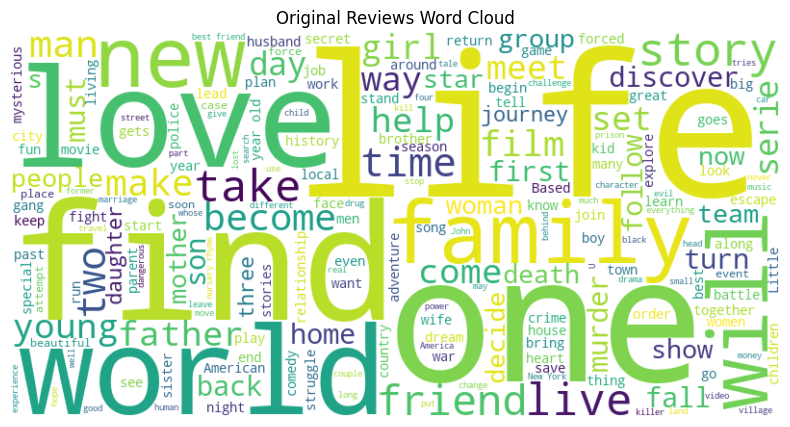

In [49]:
# Original reviews word cloud
original_text = df[review_column].astype(str).tolist()
plot_word_cloud(original_text, 'Original Reviews Word Cloud')


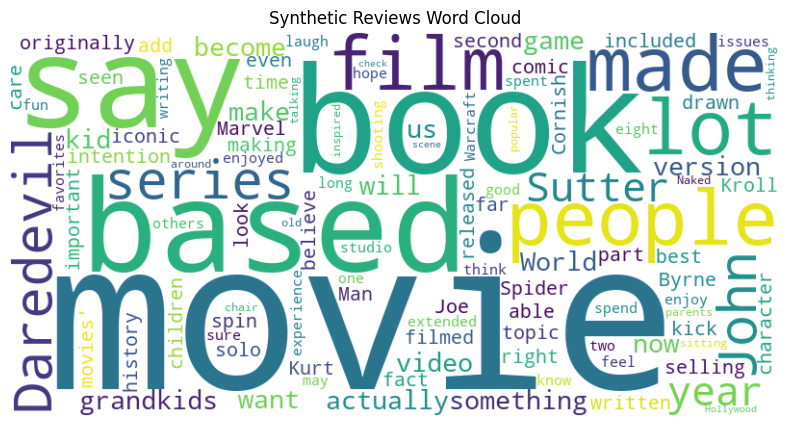

In [50]:
# Synthetic reviews word cloud
plot_word_cloud(synthetic_reviews, 'Synthetic Reviews Word Cloud')

In [51]:
# Step 7: Accuracy Calculation
original_reviews = df[review_column].astype(str).tolist()
bleu_scores = [evaluate_generated_text(original_reviews[i % len(original_reviews)], synthetic_reviews[i % len(synthetic_reviews)]) for i in range(len(synthetic_reviews))]


In [52]:
# Calculate average BLEU score
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU Score: {average_bleu_score}")


Average BLEU Score: 0.8180940303908011


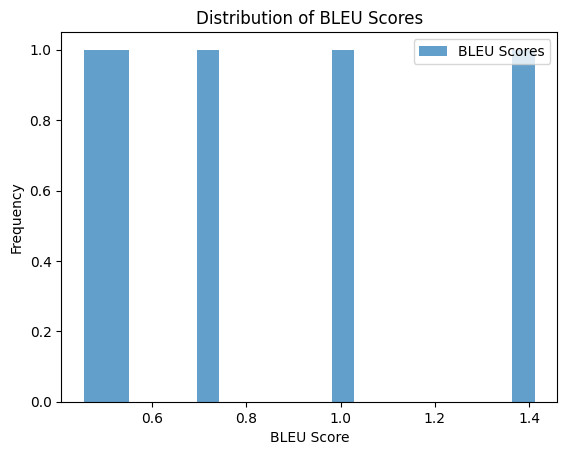

In [53]:
# Plot BLEU scores distribution
plt.hist(bleu_scores, bins=20, alpha=0.7, label='BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.title('Distribution of BLEU Scores')
plt.legend(loc='upper right')
plt.show()